#  Bank Marketing


## Data Exporation

The data set used for analysis and building machine learning models is called the Bank Marketing Data Set, taken from https://archive.ics.uci.edu/ml/datasets/Bank+Marketing. It consists of data related to marketing campaigns of a bank in Portugal, aiming to predict whether customers will subscribe to a term deposit.

The Bank-full.csv data set comprises 45,211 records with 17 features (16 input variables and 1 output variable) as follows:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('bank/bank-full.csv', header = None,sep=';')
df.columns=['age','job','marital','education','default','balance','housing','loan','contact','day','month','duration','campaign','pday','previous','poutcome','y']
df=df.drop(df.index[0])

df_data=df.iloc[:,0:-1]
df_target=df.iloc[:,-1]
 
df.head()


C:\Users\66824\AppData\Local\Temp\ipykernel_16640\3090811349.py:6: DtypeWarning: Columns (0,5,9,11,12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('bank/bank-full.csv', header = None,sep=';')


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pday,previous,poutcome,y
1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


To change the data type of numeric features to integer, where both numeric and categorical features are as follows:

In [2]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pday',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [3]:
df[["age","balance","day","duration","campaign","pday","previous"]] = df[["age","balance","day","duration","campaign","pday","previous"]].astype(str).astype(int)
num_col=[n for n in df.columns if df[n].dtype =='int']
cat_col=[n for n in df.columns if df[n].dtype =='object']

print("numeric data: ",num_col)
print("Catagorical data: ",cat_col)

numeric data:  ['age', 'balance', 'day', 'duration', 'campaign', 'pday', 'previous']
Catagorical data:  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


Change the values of the target variable by replacing 'yes' with 1 and 'no' with 0, respectively, for easier data management in the subsequent steps.

In [4]:
df['y'].replace(['yes','no'],[1,0],inplace=True)
df['y'].head()

1    0
2    0
3    0
4    0
5    0
Name: y, dtype: int64

Details and counts of values in each feature:

In [5]:
df_col=[n for n in df.columns]
for col in df_col:
    print('---',col,'---')
    print(df[col].value_counts())
    print("------------------"*5)

--- age ---
32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64
------------------------------------------------------------------------------------------
--- job ---
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
------------------------------------------------------------------------------------------
--- marital ---
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
------------------------------------------------------------------------------------------
--- education ---
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
------------------------------------

To analyze the data further, we will visualize it through the following steps:

1. Heatmap Correlation Plot: Plotting to show the correlation between features, with correlation values ranging from -1 to 1. A correlation close to 1 or -1 indicates a strong correlation between features.

2. Histogram Plot (Numeric Data): Plotting to observe the distribution of data and proportions of term deposit subscriptions among numeric data in different classes.

3. Count Plot (Categorical Data): Plotting to compare the counts of categorical data across different classes.

4. Bar Plot (Categorical Data): Plotting to observe the proportions of term deposit subscriptions among categorical data in different classes.

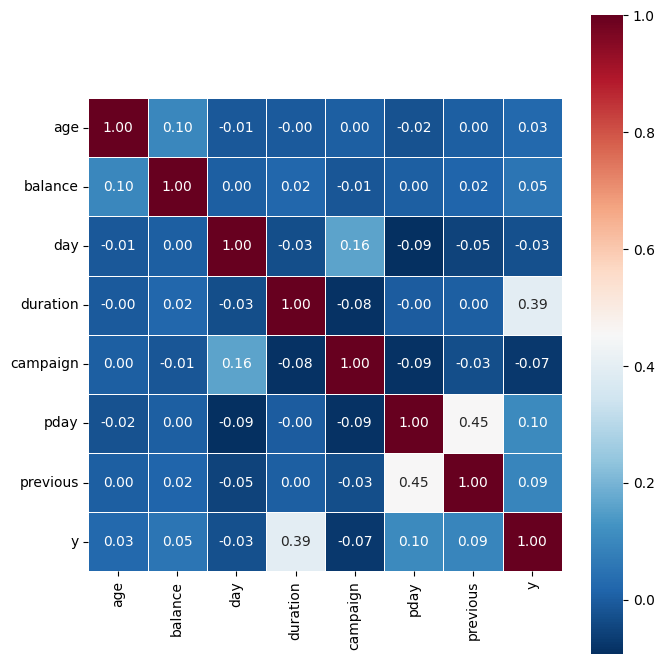

In [6]:
#Corr Heatmap 
fig, ax = plt.subplots(figsize=(7,7))  
sns.heatmap(df._get_numeric_data().astype(float).corr(),
            square=True, cmap='RdBu_r', linewidths=.5,
            annot=True, fmt='.2f').figure.tight_layout()
plt.show()

The feature 'duration' has a high correlation with the target variable 'y', indicating that it could be a good predictor for the outcome. Additionally, features 'pdays' and 'previous' also exhibit a high correlation with each other. Therefore, we can choose any one of these features to use as a predictor for the outcome.

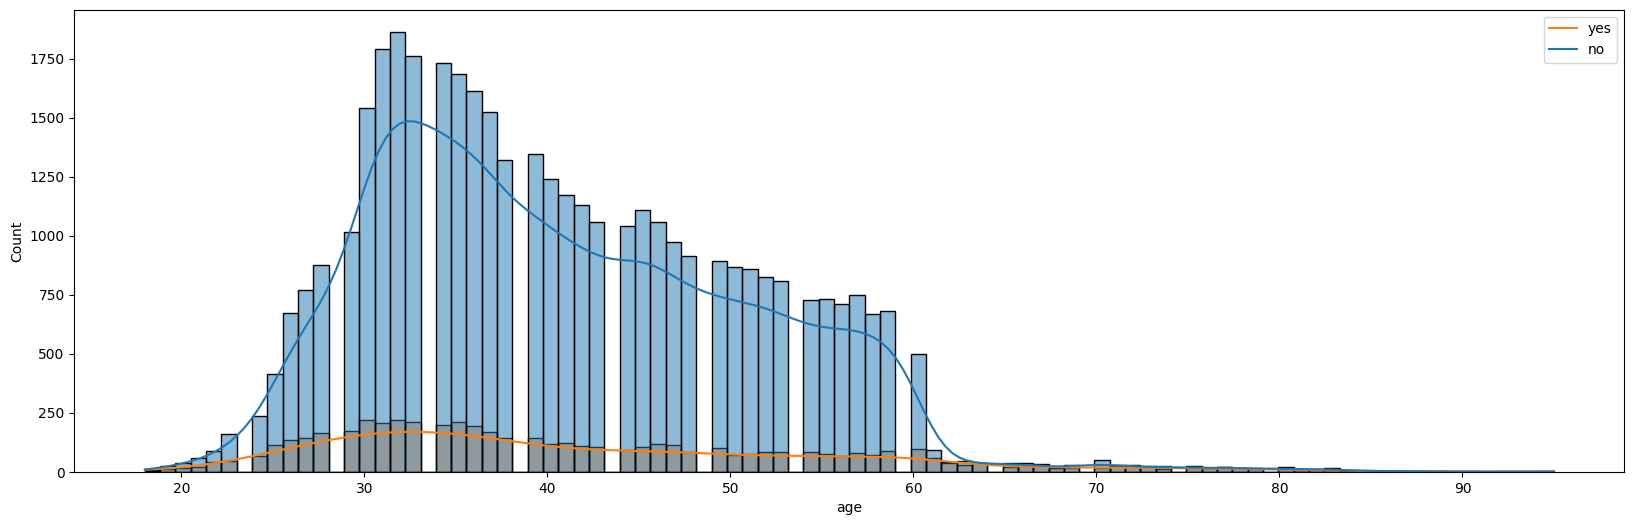

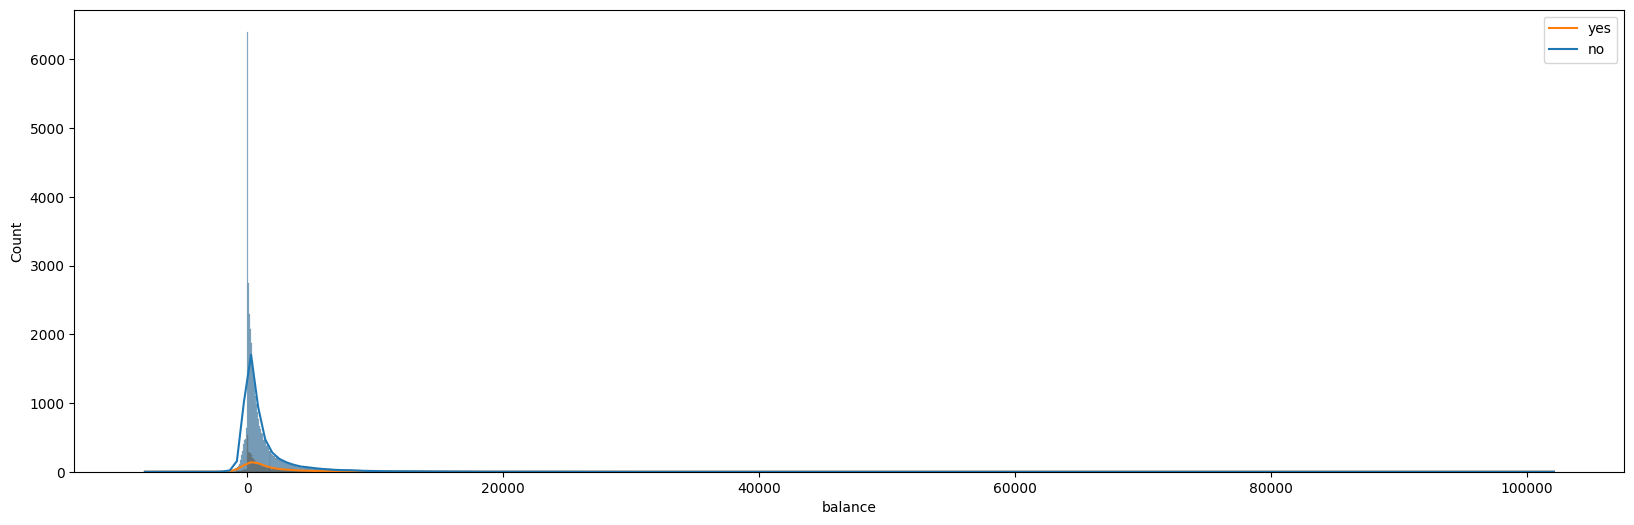

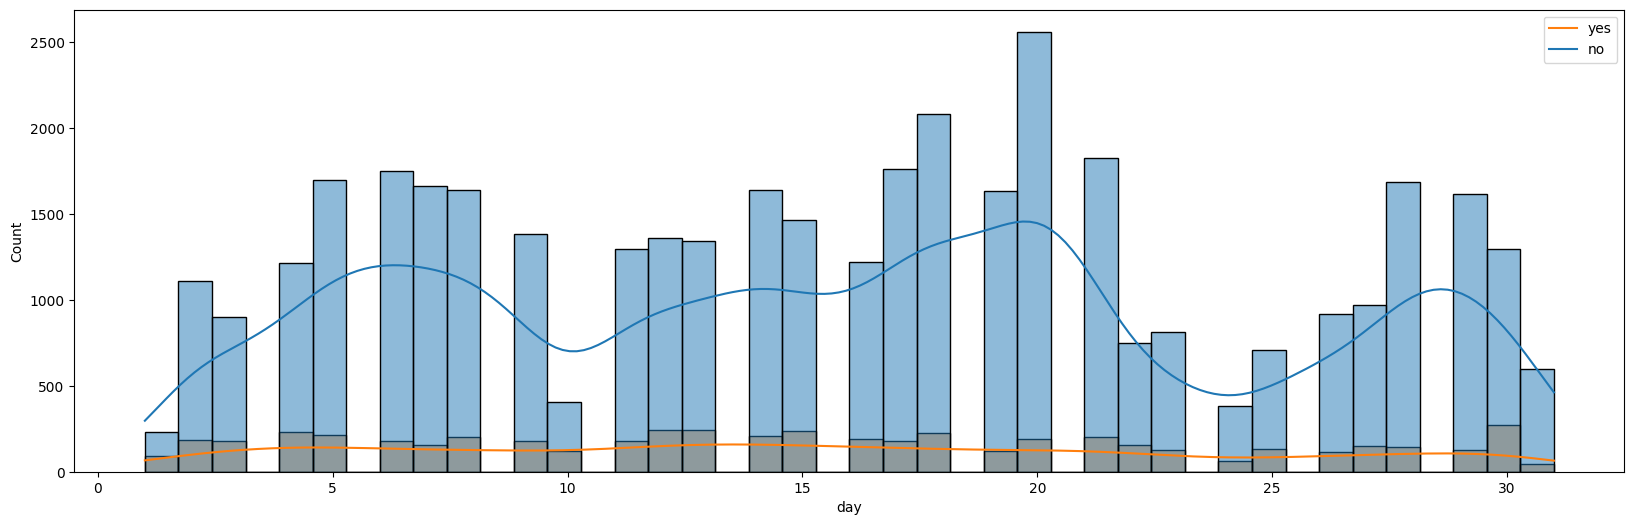

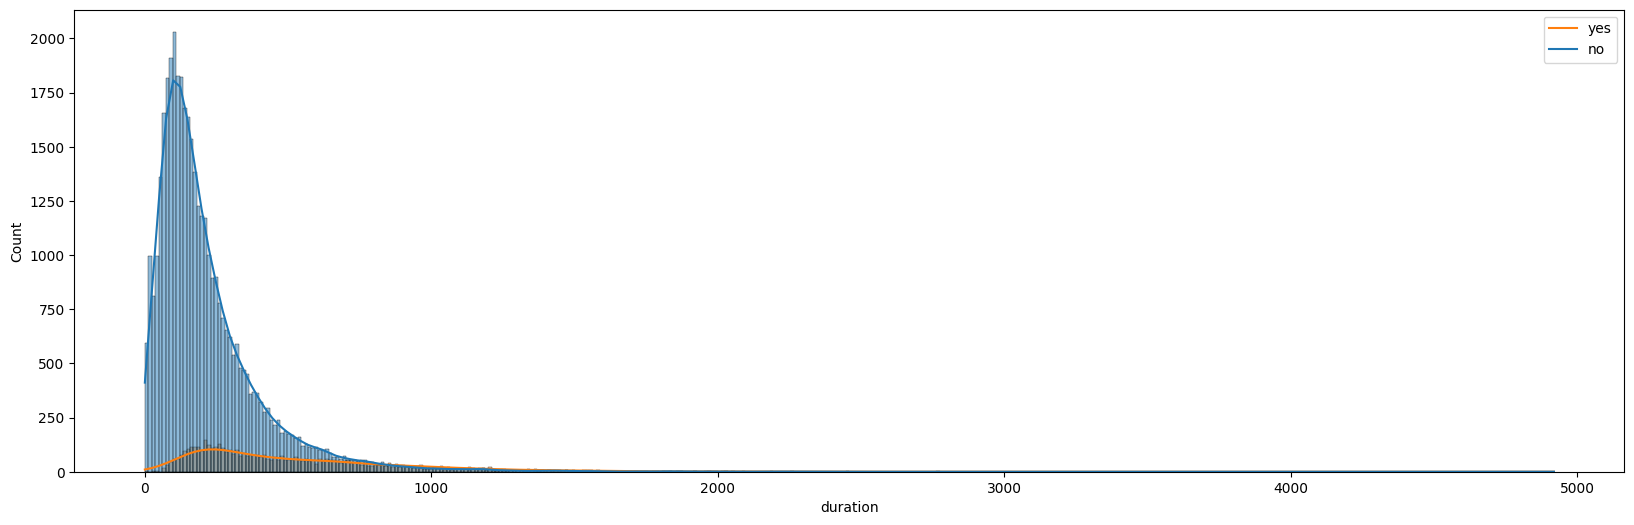

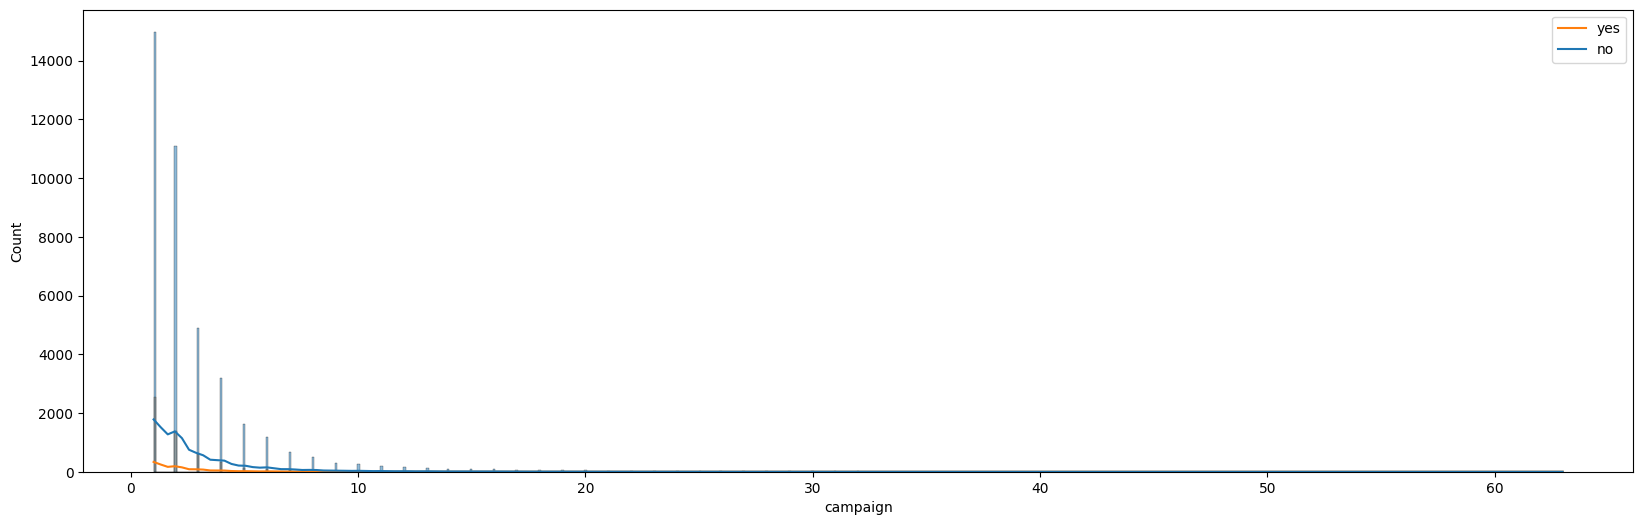

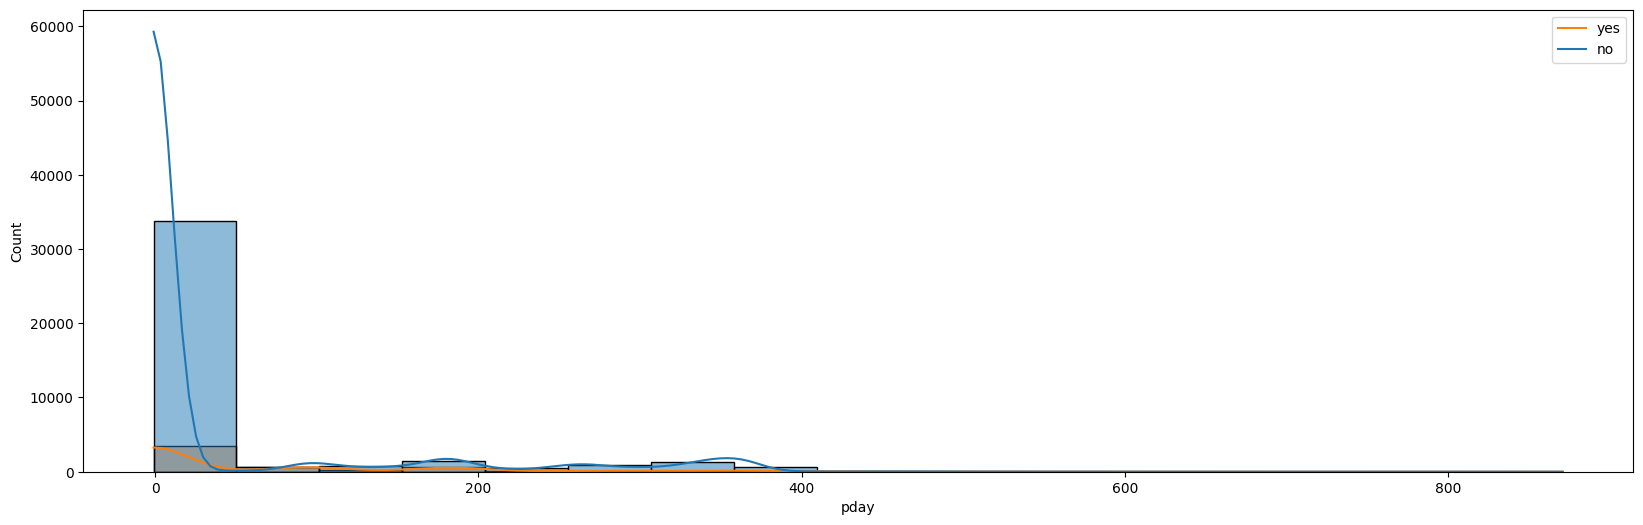

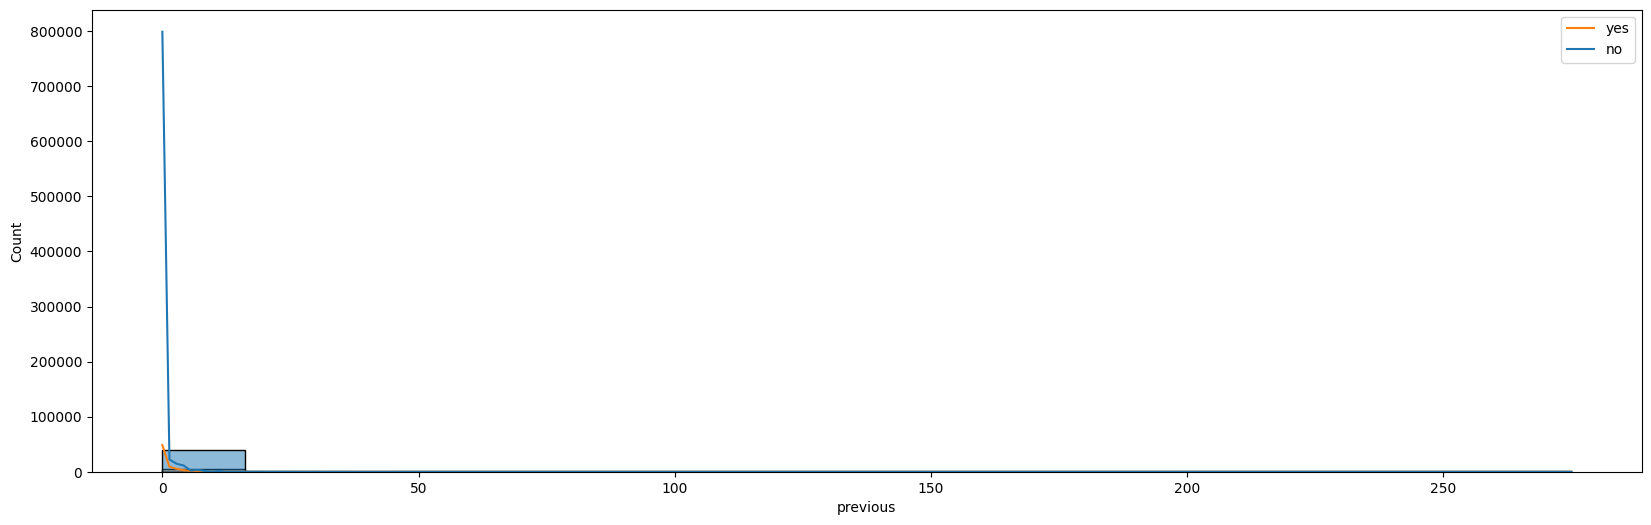

In [7]:
for col in num_col:  
    plt.figure(figsize=(20,6))
    sns.histplot(data=df,x=df[col],kde=True,hue='y')
    plt.legend(['yes','no'])

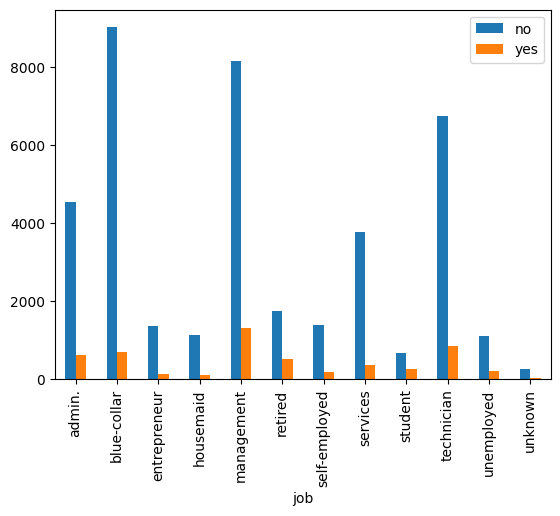

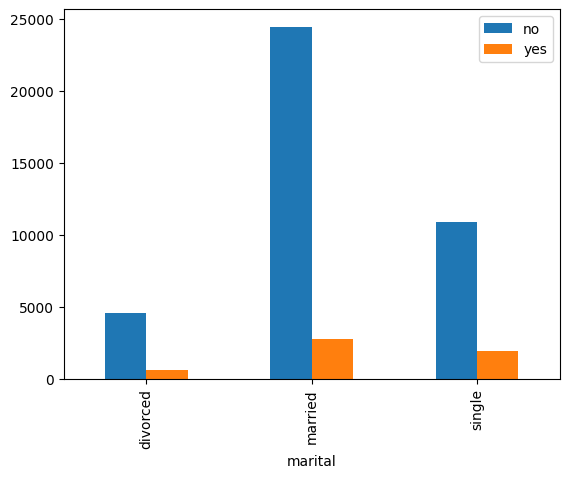

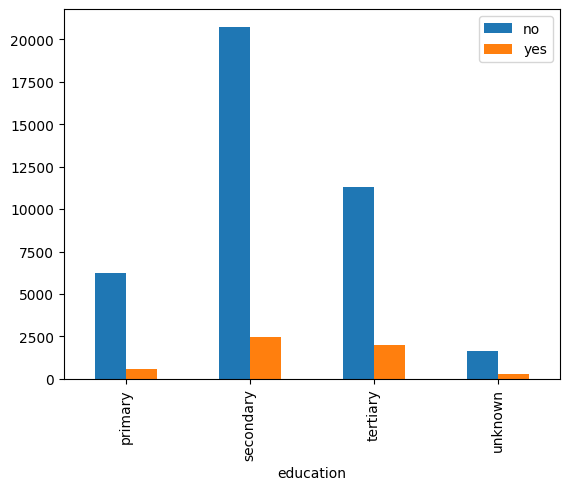

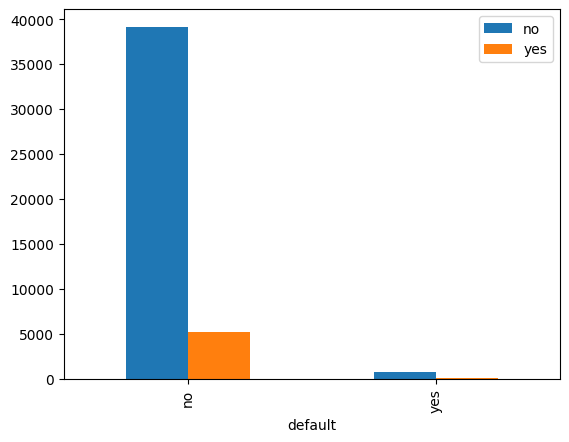

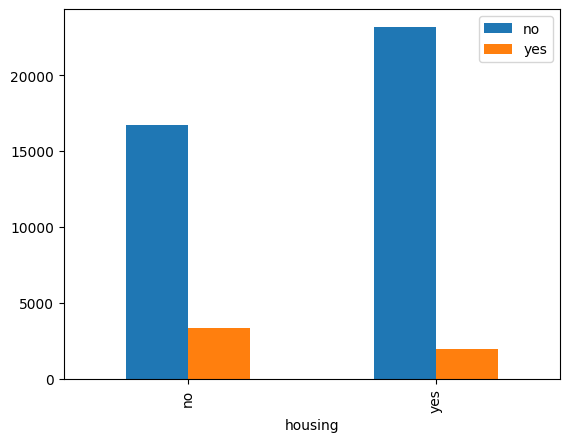

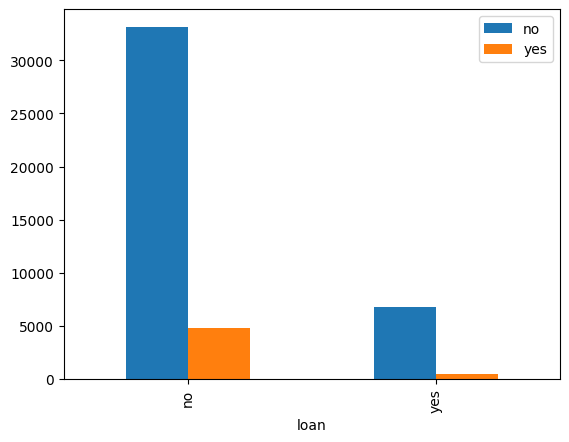

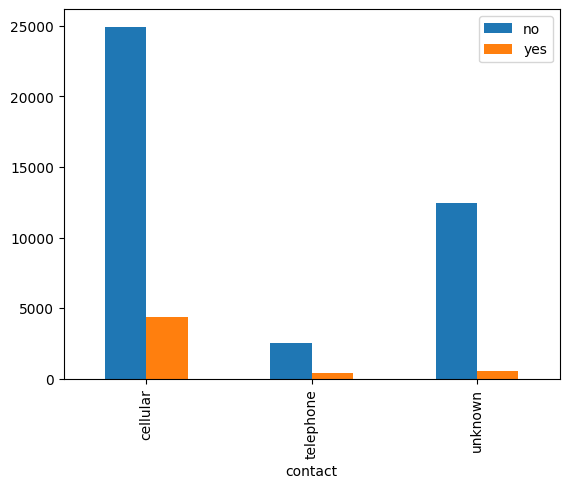

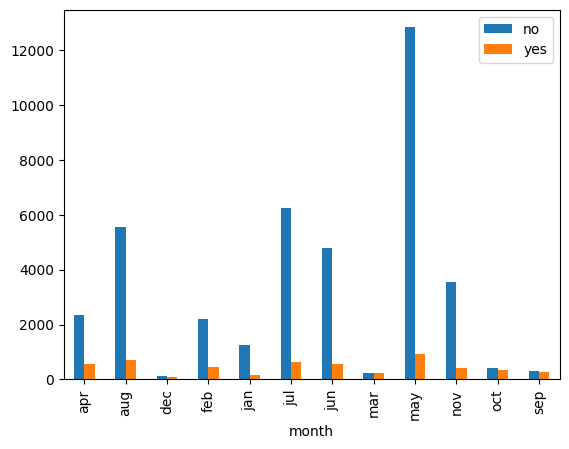

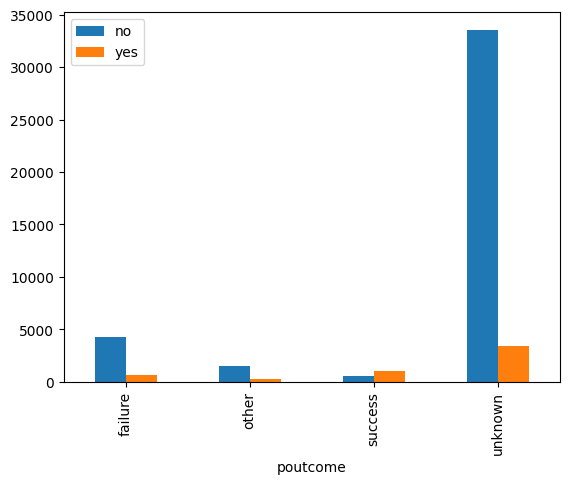

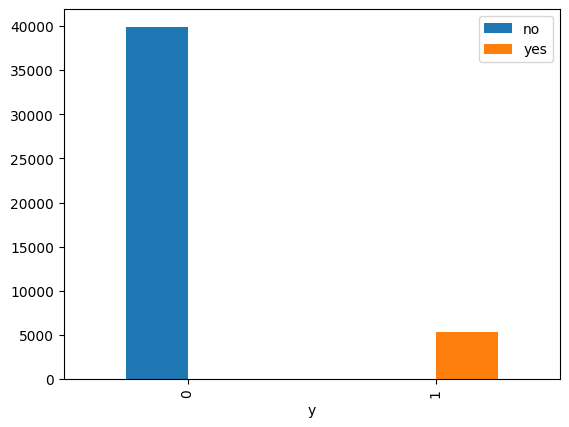

In [8]:
for col in cat_col:
    pd.crosstab(df[col],df.y).plot(kind='bar')
    plt.legend(['no','yes'])

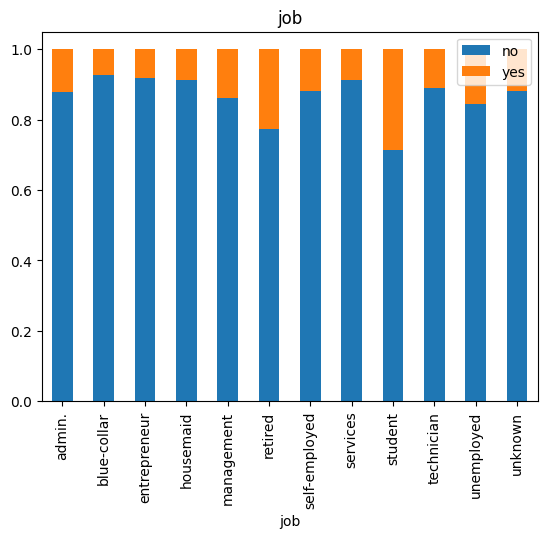

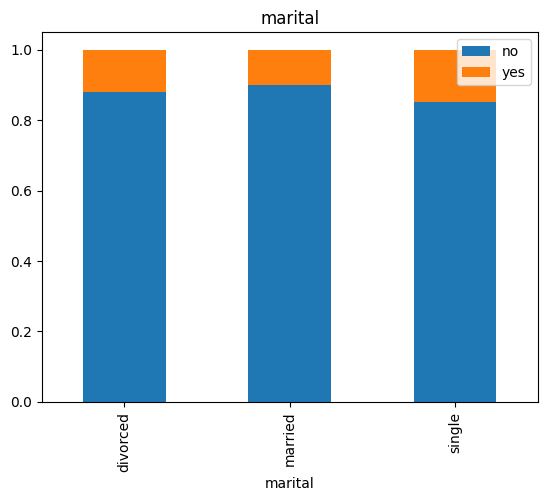

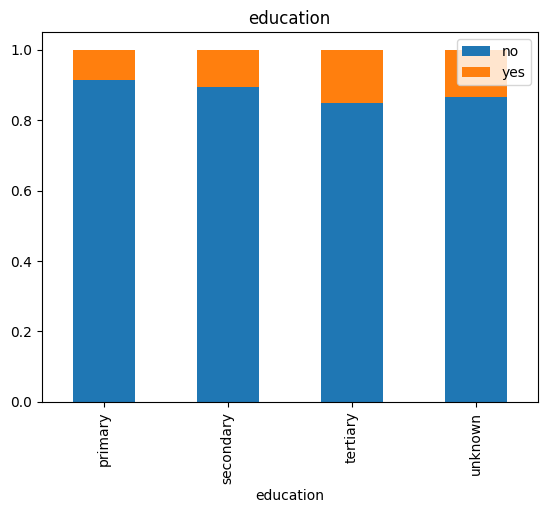

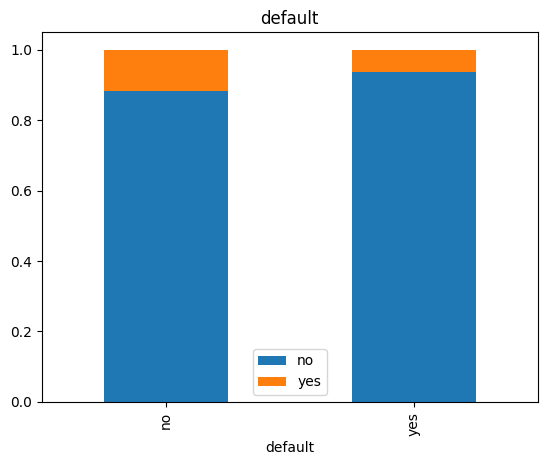

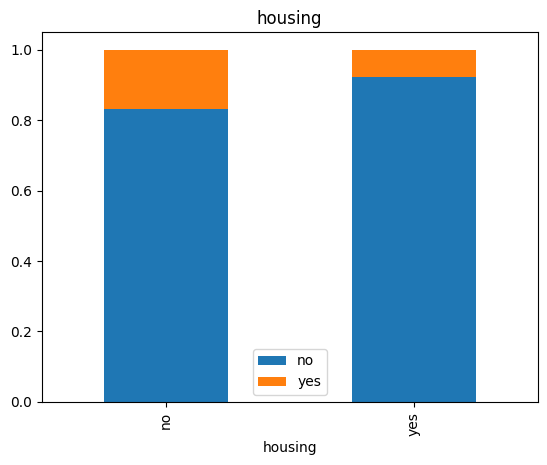

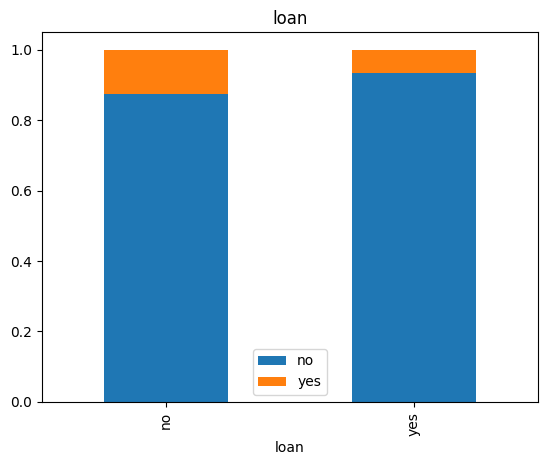

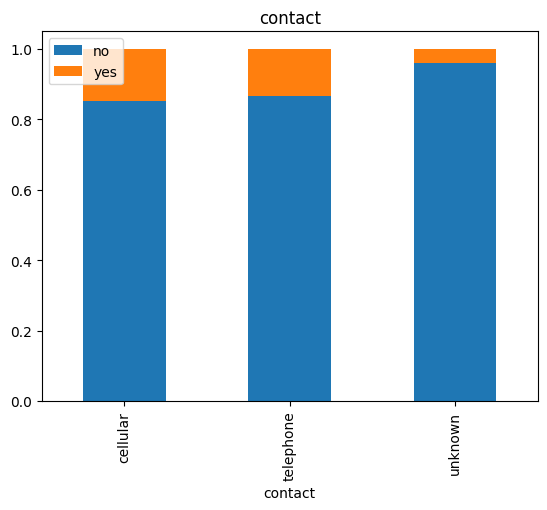

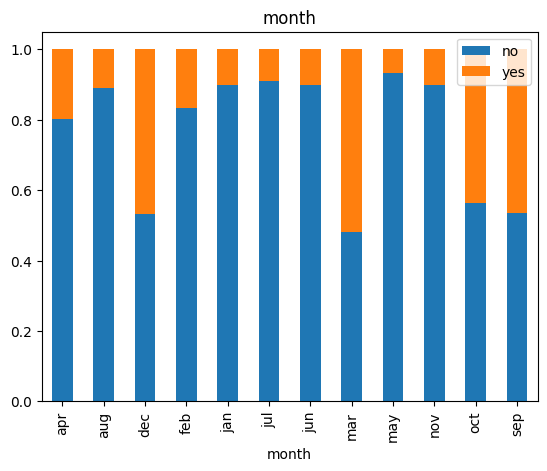

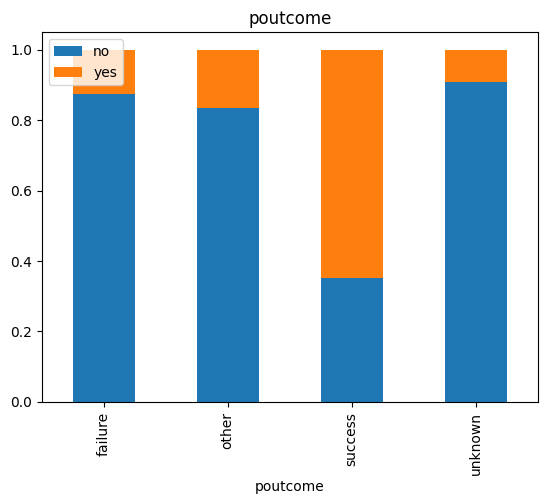

In [9]:
for col in cat_col:
    if(col not in ['y']):
        table=pd.crosstab(df[col],df.y)
        table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
        plt.title(col)
        plt.legend(['no','yes'])


### Data Exporation Summary 

- This dataset is not very good because it suffers from class imbalance in the target variable. The ratio of subscribe to no-subscribe instances is 12% to 88%, respectively. This imbalance can lead to models predicting the majority class (no-subscribe) excessively, and may fail to predict the subscribe class effectively.

- Features that are not good in the dataset:

    - 'default' because almost all data belong to the 'no' class.
    - 'poutcome' due to the large amount of unknown data.

- Features selected for prediction:

    - 'job': Directly affects an individual's income, which is believed to influence subscription decisions.
    - 'education': Higher education levels tend to correlate with higher subscription rates, as observed from the bar plot.
    - 'balance': The amount of money in an account may influence subscription decisions.
    - 'loan': Personal debt may affect decisions regarding subscription.
    - 'housing': Similar to 'loan', homeownership may influence subscription decisions.
    - 'duration': High correlation and the belief that longer call durations may lead to higher subscription rates.
    - 'campaign': The number of contacts made may affect subscription decisions.

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Experiment 1
In Experiment 1, we will preprocess the selected features obtained from the data exploration phase and build a model.

### Data Preprocessing

- Feature selection is performed based on data exploration results. Then, the feature "duration" is dropped due to an important note in the dataset indicating that it has a significant impact on the output. For example, if duration = 0, y = "no". Additionally, in reality, duration is only known after the call ends and immediately affects the outcome "y". Therefore, removing the "duration" feature ensures more realistic predictions.

- Standardization is performed using StandardScaler to ensure that data has similar variances across features and to center the mean of the data.

- Data is split into a training set (80%) and a test set (20%).

In [10]:
df1 = df.copy()
df1=df[['job','education','balance','loan','housing','duration','y']]
df1.drop(columns=['duration'],axis=1,inplace=True)

temp_df=df1.iloc[:,0:-1]
out=df1.iloc[:,-1]
temp_df=pd.get_dummies(temp_df)
df1=pd.concat([temp_df,out],axis=1)
df1.head()


from sklearn.model_selection import train_test_split
train,test=train_test_split(df1,test_size=0.2)
x_train=train.iloc[:,0:-1]
y_train=train.iloc[:,-1]

x_test=test.iloc[:,0:-1]
y_test=test.iloc[:,-1]


from sklearn.preprocessing import StandardScaler
std_sc=StandardScaler()
x_train=std_sc.fit_transform(x_train)
x_test=std_sc.fit_transform(x_test)


C:\Users\66824\AppData\Local\Temp\ipykernel_16640\3218502917.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(columns=['duration'],axis=1,inplace=True)


### Model construction and Analysist
The model used is the Logistic Regression model from the scikit-learn library, which is employed to classify the target variable's classes.

In [11]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()


The analysis of the model's performance is conducted using a confusion matrix and a classification report.

------------------------train 1-------------------------
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     31934
           1       0.25      0.00      0.00      4234

    accuracy                           0.88     36168
   macro avg       0.57      0.50      0.47     36168
weighted avg       0.81      0.88      0.83     36168



<AxesSubplot:>

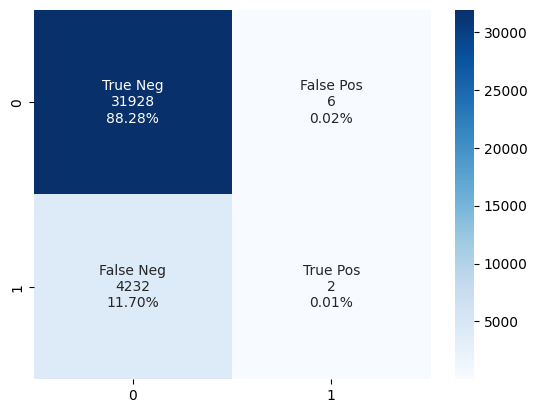

In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred=model.predict(x_train)
cf_matrix=confusion_matrix(y_train,y_pred)
print("------------------------train 1-------------------------")
print(classification_report(y_train, y_pred))

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

------------------------test 1-------------------------
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      7988
           1       0.00      0.00      0.00      1055

    accuracy                           0.88      9043
   macro avg       0.44      0.50      0.47      9043
weighted avg       0.78      0.88      0.83      9043



c:\Users\66824\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\66824\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\66824\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

<AxesSubplot:>

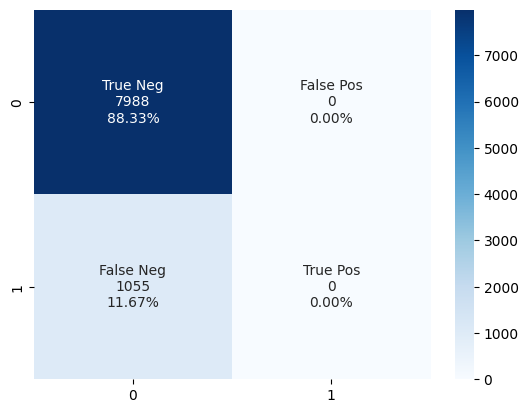

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred=model.predict(x_test)
cf_matrix=confusion_matrix(y_test,y_pred)
print("------------------------test 1-------------------------")
print(classification_report(y_test, y_pred))

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')


From the results of the model, it is observed that although the accuracy of the model is high at 88%, examining the confusion matrix reveals that the model almost does not predict the "subscribe" class at all. This leads to a precision and recall of 0 for the "subscribe" class. Therefore, this model cannot be used effectively. This issue may stem from inappropriate feature selection. Hence, adjustments will be made to the feature selection process in the next step.

## Experiment 2 

Due to the poor performance of the model resulting from the feature selection in Experiment 1 based on data exploration, which led to a model that does not predict the "subscribe" class, Experiment 2 will involve feature selection using chi2.

### Data Prepocessing
- All numeric features are dropped because, based on the correlation heatmap, it is observed that each feature has very low correlation with the target.

- Normalization is performed using MinMaxScaler to standardize the data and rescale it to a range between 0 and 1. This is done because chi2 cannot be used with negative values, so MinMaxScaler is used instead of StandardScaler.

- Feature selection is conducted using chi2.

- The data is split into a training set (80%) and a test set (20%).

In [14]:
df2 = df.copy()
df2.drop(columns=['duration'],axis=1,inplace=True)

for col in num_col:
    df.drop(columns=col,axis=1,inplace=True)

temp_df=df2.iloc[:,0:-1]
out=df2.iloc[:,-1]
temp_df=pd.get_dummies(temp_df)
df2=pd.concat([temp_df,out],axis=1)
df2.head()


from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import MinMaxScaler

x=df2.iloc[:,0:-1]
y=df2.iloc[:,-1]

scale=MinMaxScaler()
x=scale.fit_transform(x)

chi2_selector=SelectKBest(chi2,k=10)
chi2_selector.fit(x,y)

kbest = np.asarray(df2.columns[0:-1])[chi2_selector.get_support()]
kbest

df2=df2[kbest]
df2=pd.concat([df2,out],axis=1)
df2


,job_retired,housing_no,housing_yes,contact_cellular,contact_unknown,month_mar,month_may,month_oct,month_sep,poutcome_success,y
1,0,0,1,0,1,0,1,0,0,0,0
2,0,0,1,0,1,0,1,0,0,0,0
3,0,0,1,0,1,0,1,0,0,0,0
4,0,0,1,0,1,0,1,0,0,0,0
5,0,1,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
45207,0,1,0,1,0,0,0,0,0,0,1
45208,1,1,0,1,0,0,0,0,0,0,1
45209,1,1,0,1,0,0,0,0,0,1,1
45210,0,1,0,0,0,0,0,0,0,0,0


In [15]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(df2,test_size=0.2)
x_train=train.iloc[:,0:-1]
y_train=train.iloc[:,-1]

x_test=test.iloc[:,0:-1]
y_test=test.iloc[:,-1]

### Model construction and Analysist
The model used is the Logistic Regression model from the scikit-learn library, which is employed to classify the target variable's classes.

In [16]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(x_train,y_train)


LogisticRegression()

The analysis of the model's performance is conducted using a confusion matrix and a classification report.

------------------------train 2-------------------------
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     31879
           1       0.63      0.19      0.29      4289

    accuracy                           0.89     36168
   macro avg       0.77      0.59      0.62     36168
weighted avg       0.87      0.89      0.86     36168



<AxesSubplot:>

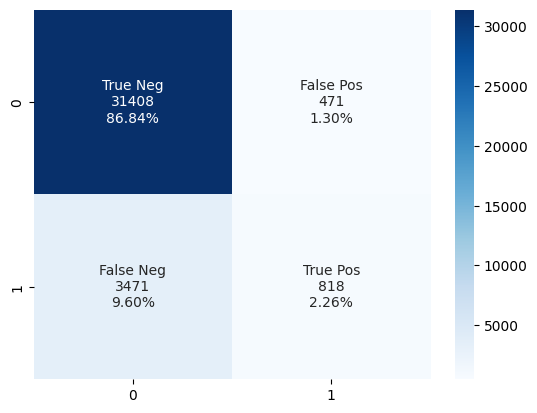

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred=model.predict(x_train)
cf_matrix=confusion_matrix(y_train,y_pred)
print("------------------------train 2-------------------------")
print(classification_report(y_train, y_pred))

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

------------------------test 2-------------------------
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      8043
           1       0.61      0.23      0.33      1000

    accuracy                           0.90      9043
   macro avg       0.76      0.60      0.64      9043
weighted avg       0.88      0.90      0.88      9043



<AxesSubplot:>

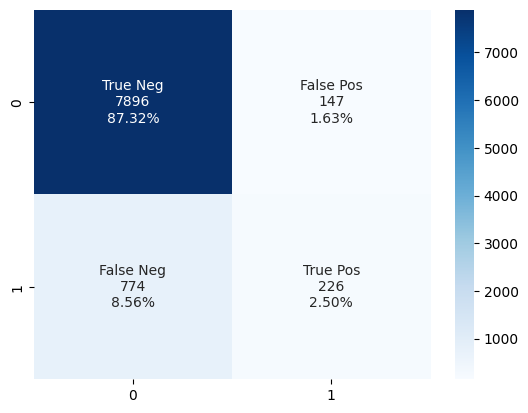

In [18]:
y_pred=model.predict(x_test)
cf_matrix=confusion_matrix(y_test,y_pred)
print("------------------------test 2-------------------------")
print(classification_report(y_test, y_pred))

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

After adjusting the feature selection, the model's performance has improved slightly, as it predicts the "subscribe" class more frequently. The precision for the "subscribe" class has increased to approximately 60%, but the recall remains low at 15-20%. This indicates that the model still fails to accurately predict individuals who want to subscribe, which could result in losing more than 80% of potential subscribers. This outcome is likely due to the significant imbalance in the target variable within the dataset. Therefore, adjustments will be made in the next step to address this issue.

## Experiment 3


Due to the imbalance in the target feature of the dataset, leading to poor predictions of the "subscribe" class by the model, Experiment 3 will involve using the dataset from Experiment 2 to perform oversampling using SMOTE. This technique will generate synthetic data for the training set to achieve a better balance.

### Data Preprocessing

In Experiment 3, the preprocessing steps will be the same as Experiment 2.

In [19]:
df3 = df2.copy()
df3

,job_retired,housing_no,housing_yes,contact_cellular,contact_unknown,month_mar,month_may,month_oct,month_sep,poutcome_success,y
1,0,0,1,0,1,0,1,0,0,0,0
2,0,0,1,0,1,0,1,0,0,0,0
3,0,0,1,0,1,0,1,0,0,0,0
4,0,0,1,0,1,0,1,0,0,0,0
5,0,1,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
45207,0,1,0,1,0,0,0,0,0,0,1
45208,1,1,0,1,0,0,0,0,0,0,1
45209,1,1,0,1,0,0,0,0,0,1,1
45210,0,1,0,0,0,0,0,0,0,0,0


over sampling with SMOTE

In [20]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(df3,test_size=0.2)
x_train=train.iloc[:,0:-1]
y_train=train.iloc[:,-1]

x_test=test.iloc[:,0:-1]
y_test=test.iloc[:,-1]

from imblearn.over_sampling import SMOTE
from collections import Counter

counter = Counter(y_train)
print(counter)

oversample = SMOTE()
x_train, y_train = oversample.fit_resample(x_train, y_train)

counter = Counter(y_train)
print(counter)

Counter({0: 31965, 1: 4203})
Counter({0: 31965, 1: 31965})


### Model construction and Analysist

The model used is the Logistic Regression model from the scikit-learn library, which is employed to classify the target variable's classes.

In [21]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(x_train,y_train)


LogisticRegression()


The analysis of the model's performance is conducted using a confusion matrix and a classification report.

------------------------train 3-------------------------
              precision    recall  f1-score   support

           0       0.66      0.68      0.67     31965
           1       0.67      0.65      0.66     31965

    accuracy                           0.67     63930
   macro avg       0.67      0.67      0.67     63930
weighted avg       0.67      0.67      0.67     63930



<AxesSubplot:>

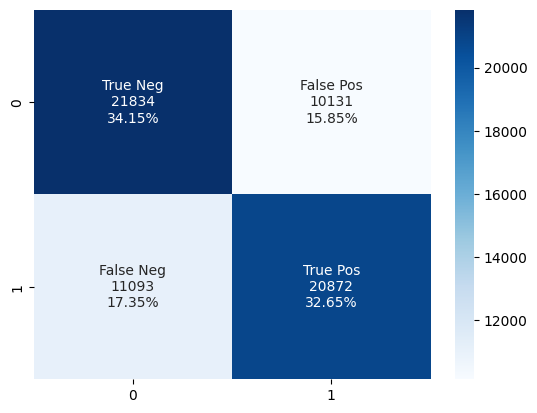

In [22]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred=model.predict(x_train)
cf_matrix=confusion_matrix(y_train,y_pred)
print("------------------------train 3-------------------------")
print(classification_report(y_train, y_pred))

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

------------------------test 3-------------------------
              precision    recall  f1-score   support

           0       0.93      0.69      0.79      7957
           1       0.22      0.63      0.32      1086

    accuracy                           0.68      9043
   macro avg       0.57      0.66      0.56      9043
weighted avg       0.85      0.68      0.74      9043



<AxesSubplot:>

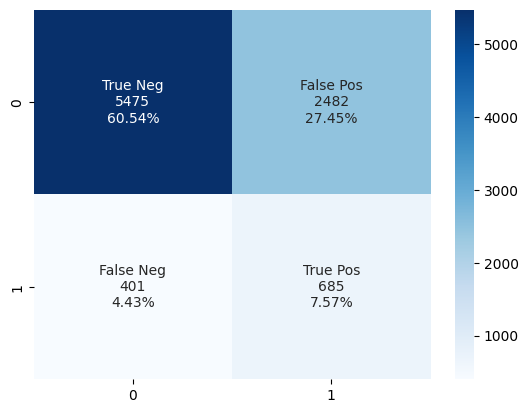

In [23]:
y_pred=model.predict(x_test)
cf_matrix=confusion_matrix(y_test,y_pred)
print("------------------------test 3-------------------------")
print(classification_report(y_test, y_pred))

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

From the results of Experiment 3, it is observed that the accuracy decreases compared to Experiment 2. This is because adding more training data may not necessarily improve the model's predictive performance, as the additional data may not contribute positively to the prediction. Consequently, the overall accuracy of the predictions decreases.

Upon closer inspection, it is noted that the precision for the "No-subscribe" class in the test set is higher than in the training set. However, the recall for both classes increases significantly compared to Experiment 2. This indicates that the model can predict individuals who want to subscribe more accurately. Therefore, the model has a better chance of acquiring more bank customers.

## Experiment 4

In Experiment 4, we will perform hyperparameter tuning using grid search. We will utilize the dataset from Experiment 2 for this purpose.

### Data Preprocessing
The preprocessing steps will be the same as Experiment 2.

In [24]:
df4=df2.copy()
df4

,job_retired,housing_no,housing_yes,contact_cellular,contact_unknown,month_mar,month_may,month_oct,month_sep,poutcome_success,y
1,0,0,1,0,1,0,1,0,0,0,0
2,0,0,1,0,1,0,1,0,0,0,0
3,0,0,1,0,1,0,1,0,0,0,0
4,0,0,1,0,1,0,1,0,0,0,0
5,0,1,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
45207,0,1,0,1,0,0,0,0,0,0,1
45208,1,1,0,1,0,0,0,0,0,0,1
45209,1,1,0,1,0,0,0,0,0,1,1
45210,0,1,0,0,0,0,0,0,0,0,0


In [25]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(df4,test_size=0.2)
x_train=train.iloc[:,0:-1]
y_train=train.iloc[:,-1]

x_test=test.iloc[:,0:-1]
y_test=test.iloc[:,-1]

### Model construction and Analysist
The model used is the Logistic Regression from sklearn to classify the target class.

Parameters adjusted using GridSearch are as follows:

- Solvers: Each solver is suitable for different dataset sizes and affects training speed and model performance differently.
- Penalty: Regularization for Logistic Regression, with each penalty supporting different solvers.
- C values: Weight parameters affecting the penalty.
Cross-validation is performed with 10 splits and 3 repeats.

The parameter grid for GridSearchCV is set with scoring as "recall" because the "recall" value of the results in Experiment 2 is low.

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

model=LogisticRegression()

solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

model_cv=GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='recall')
model_cv.fit(x_train,y_train)

print("Best: %f using %s" % (model_cv.best_score_, model_cv.best_params_))


Best: 0.178691 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}



The analysis of the model's performance is conducted using a confusion matrix and a classification report.

------------------------train 4-------------------------
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     31926
           1       0.66      0.19      0.29      4242

    accuracy                           0.89     36168
   macro avg       0.78      0.59      0.62     36168
weighted avg       0.87      0.89      0.87     36168



<AxesSubplot:>

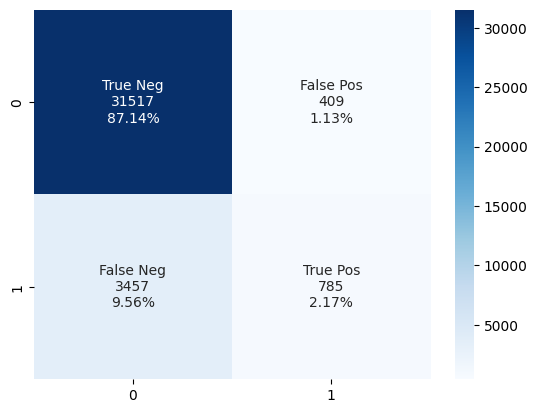

In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred=model_cv.predict(x_train)
cf_matrix=confusion_matrix(y_train,y_pred)
print("------------------------train 4-------------------------")
print(classification_report(y_train, y_pred))

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

------------------------test 4-------------------------
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7996
           1       0.67      0.18      0.28      1047

    accuracy                           0.89      9043
   macro avg       0.79      0.58      0.61      9043
weighted avg       0.88      0.89      0.87      9043



<AxesSubplot:>

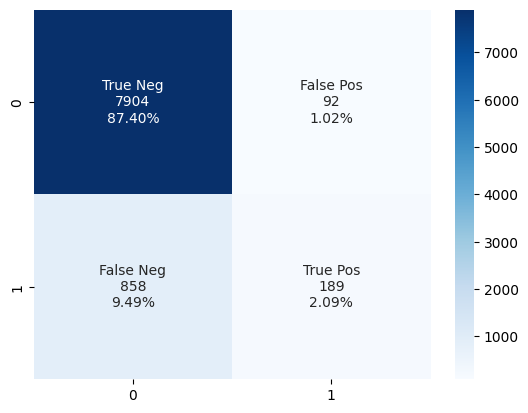

In [28]:
y_pred=model_cv.predict(x_test)
cf_matrix=confusion_matrix(y_test,y_pred)
print("------------------------test 4-------------------------")
print(classification_report(y_test, y_pred))

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')


From the hyperparameter tuning, it was found that the best hyperparameters are {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}.

Comparing the model results between Experiment 2 and Experiment 4, there is not much difference. In the "subscribe" class, there is a slight decrease in precision but a slightly better recall, which is the scoring metric used in GridSearchCV. This could be due to the logistic regression parameters in Experiment 2 already being suitable, or the hyperparameter tuning in Experiment 4 not having as significant an impact as expected. Further study on hyperparameters is necessary for future improvements.

## Experiment 5

In Experiment 5, we will perform hyperparameter tuning using grid search. We will utilize the dataset from Experiment 3 for this purpose.

### Data Preprocessing

### Data Preprocessing

The preprocessing steps will be the same as Experiment 3.

In [29]:
df5=df2.copy()
df5

,job_retired,housing_no,housing_yes,contact_cellular,contact_unknown,month_mar,month_may,month_oct,month_sep,poutcome_success,y
1,0,0,1,0,1,0,1,0,0,0,0
2,0,0,1,0,1,0,1,0,0,0,0
3,0,0,1,0,1,0,1,0,0,0,0
4,0,0,1,0,1,0,1,0,0,0,0
5,0,1,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
45207,0,1,0,1,0,0,0,0,0,0,1
45208,1,1,0,1,0,0,0,0,0,0,1
45209,1,1,0,1,0,0,0,0,0,1,1
45210,0,1,0,0,0,0,0,0,0,0,0


In [30]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(df5,test_size=0.2)
x_train=train.iloc[:,0:-1]
y_train=train.iloc[:,-1]

x_test=test.iloc[:,0:-1]
y_test=test.iloc[:,-1]

from imblearn.over_sampling import SMOTE
from collections import Counter

counter = Counter(y_train)
print(counter)

oversample = SMOTE()
x_train, y_train = oversample.fit_resample(x_train, y_train)

counter = Counter(y_train)
print(counter)

Counter({0: 31915, 1: 4253})
Counter({0: 31915, 1: 31915})


### Model construction and Analysist
The model used is the Logistic Regression from scikit-learn to classify the target class.

Parameters adjusted using GridSearch are as follows:

Solvers: Each solver is suitable for different dataset sizes and affects training speed and model performance differently.
Penalty: Regularization for Logistic Regression, with each penalty supporting different solvers.
C values: Weight parameters affecting the penalty.
Cross-validation is performed with 10 splits and 3 repeats.

The parameter grid for GridSearchCV is set with scoring as "recall" because the "recall" value indicates the model's ability to predict the "subscribe" class.

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

model=LogisticRegression()

solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

model_cv=GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='recall')
model_cv.fit(x_train,y_train)

print("Best: %f using %s" % (model_cv.best_score_, model_cv.best_params_))


Best: 0.656744 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}



The analysis of the model's performance is conducted using a confusion matrix and a classification report.

------------------------train 5-------------------------
              precision    recall  f1-score   support

           0       0.67      0.69      0.68     31915
           1       0.68      0.66      0.67     31915

    accuracy                           0.67     63830
   macro avg       0.67      0.67      0.67     63830
weighted avg       0.67      0.67      0.67     63830



<AxesSubplot:>

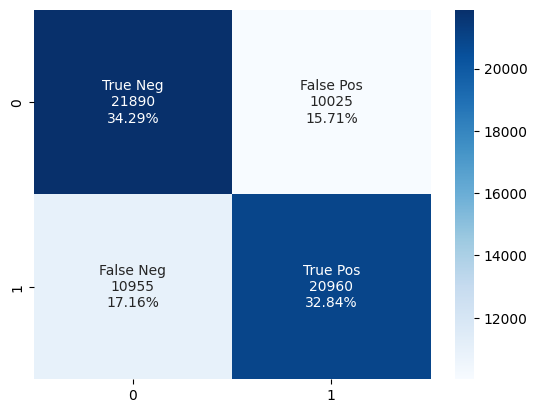

In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred=model_cv.predict(x_train)
cf_matrix=confusion_matrix(y_train,y_pred)
print("------------------------train 5-------------------------")
print(classification_report(y_train, y_pred))

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

------------------------test 5-------------------------
              precision    recall  f1-score   support

           0       0.93      0.68      0.79      8007
           1       0.20      0.64      0.31      1036

    accuracy                           0.67      9043
   macro avg       0.57      0.66      0.55      9043
weighted avg       0.85      0.67      0.73      9043



<AxesSubplot:>

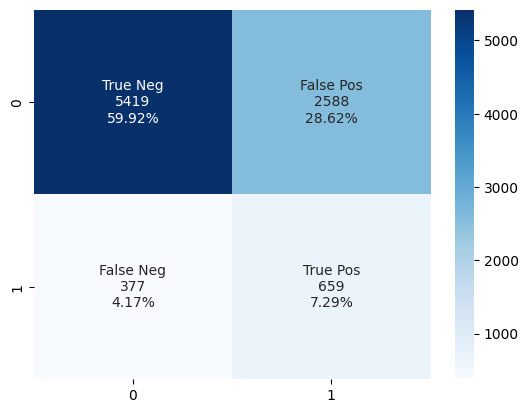

In [33]:
y_pred=model_cv.predict(x_test)
cf_matrix=confusion_matrix(y_test,y_pred)
print("------------------------test 5-------------------------")
print(classification_report(y_test, y_pred))

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')


From the hyperparameter tuning, it was found that the best hyperparameters are {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}.

Comparing the model results between Experiment 3 and Experiment 5, there is not much difference. This could be due to the logistic regression parameters in Experiment 3 already being suitable, or the hyperparameter tuning in Experiment 5 not having as significant an impact as expected. Further study on hyperparameters is necessary for future improvements.

## Result Analysist

- The feature selection in Experiment 1 was inappropriate because even though the accuracy was high at 88%, it couldn't predict the "subscribe" class at all. This resulted in the bank being unable to know which customers might subscribe.

- Feature selection by dropping numeric features and using the chi2 method improved the model's performance, as it predicted the "subscribe" class more accurately. However, it still remained below 20%, likely due to the imbalance in the target feature in the dataset.

- Oversampling to balance the target feature in the training data resulted in a decrease in overall model accuracy. This was because the sampled data reduced the accuracy of predicting outcomes. However, it increased the recall of the "subscribe" class, meaning the bank could identify subscribing customers better.

- Hyperparameter tuning did not significantly impact the model results. Further study on hyperparameter tuning is necessary, as it may be influenced by the parameters already optimized in Experiments 2 and 3, or the tuning itself was not effective.

- If there's a need to select a model for actual use, the model from Experiment 5 would be chosen because it had the highest recall in the "subscribe" class. This would enable the bank to identify subscribing customers better, even though the precision might be low. In the context of term deposit subscriptions, inaccurate predictions may not have a significant impact. Conversely, using a model with high accuracy but low precision and recall in the "subscribe" class would not allow the bank to utilize the data effectively, as it might lose many potential subscribing customers.